<a href="https://colab.research.google.com/github/pannavich/2143488_Big_Data_and_AI/blob/main/HW7_K-Means-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data AI/HW3/HW3_movie_metadata.csv')
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
df.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
df['imdb_score']

0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
       ... 
5038    7.7
5039    7.5
5040    6.3
5041    6.3
5042    6.6
Name: imdb_score, Length: 5043, dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
for i in df.index:
  df.at[i,'imdb_score']=int(df.at[i,'imdb_score'])



In [ ]:
df['imdb_score']

0       7.0
1       7.0
2       6.0
3       8.0
5       6.0
       ... 
5026    6.0
5027    7.0
5033    7.0
5035    6.0
5042    6.0
Name: imdb_score, Length: 3757, dtype: float64

In [ ]:
imdb_score = pd.DataFrame(df['imdb_score'])

In [ ]:
drop=[]
for col in df:
  if df[col].dtypes==object:
    drop.append(col)
df = df.drop(drop,axis=1)


In [ ]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df=normalized_df.drop('imdb_score',axis=1)
normalized_df=pd.concat([normalized_df,imdb_score],axis=1)
normalized_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,0.889026,0.481229,0.000000,0.037174,0.001563,1.000000,0.524429,0.007361,0.000000,0.603244,1.940156e-02,0.921348,0.006832,0.040486,0.094556,7.0
1,0.369914,0.450512,0.024478,0.043478,0.062500,0.406840,0.278829,0.073622,0.000000,0.244066,2.455894e-02,0.898876,0.036496,0.078947,0.000000,7.0
2,0.739827,0.378840,0.000000,0.007000,0.017188,0.263080,0.163213,0.017816,0.023256,0.195807,2.005647e-02,0.988764,0.002869,0.078947,0.243553,6.0
3,1.000000,0.433447,0.956522,1.000000,0.042188,0.589253,0.677200,0.162561,0.000000,0.533426,2.046578e-02,0.955056,0.167883,0.078947,0.469914,8.0
5,0.567201,0.324232,0.020652,0.023043,0.001000,0.096066,0.125535,0.002852,0.023256,0.145174,2.158731e-02,0.955056,0.004613,0.078947,0.068768,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,0.097411,0.249147,0.004652,0.001957,0.000900,0.000179,0.002268,0.001182,0.023256,0.006922,3.505383e-07,0.865169,0.000971,0.078947,0.000490,6.0
5027,0.076449,0.180887,0.017261,0.000000,0.000008,0.000886,0.002642,0.000008,0.000000,0.004351,8.007859e-07,0.820225,0.000000,0.045209,0.001997,7.0
5033,0.173859,0.136519,0.012652,0.000348,0.000455,0.000558,0.042936,0.000560,0.000000,0.072587,5.551963e-07,0.865169,0.000328,0.045209,0.054441,7.0
5035,0.066584,0.150171,0.000000,0.000261,0.000189,0.002683,0.030754,0.000224,0.000000,0.024921,5.551963e-07,0.730337,0.000146,0.012821,0.000000,6.0


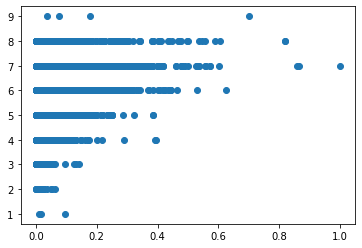

In [ ]:
plt.scatter(normalized_df['gross'], normalized_df['imdb_score'])

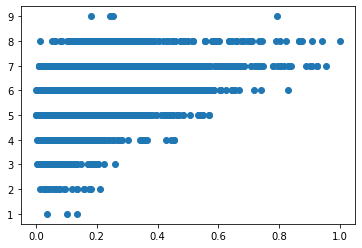

In [ ]:
plt.scatter(normalized_df['num_critic_for_reviews'], normalized_df['imdb_score'])

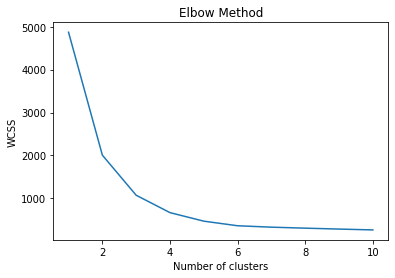

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score (n=2) : 0.57043587960023
Silhouette Score (n=3) : 0.583674119195728
Silhouette Score (n=4) : 0.6263499089274749
Silhouette Score (n=5) : 0.6586572194254099
Silhouette Score (n=6) : 0.676291075276657
Silhouette Score (n=7) : 0.5982143727947596
Silhouette Score (n=8) : 0.4440963314905839
Silhouette Score (n=9) : 0.6084274213271105
Silhouette Score (n=10) : 0.4509495603683594


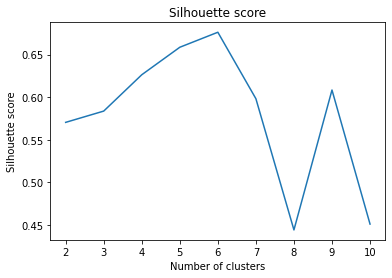

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
import seaborn as sns
silhouette = []
for i in range(2,11):
  KMean= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  KMean.fit(normalized_df)
  label=KMean.predict(normalized_df)
  sil = silhouette_score(normalized_df, label)
  silhouette.append(sil)
  print('Silhouette Score (n='+str(i)+') : '+str(sil))
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


WCSS: 2006.0810516149518
          0
0  6.553835
1  4.608612


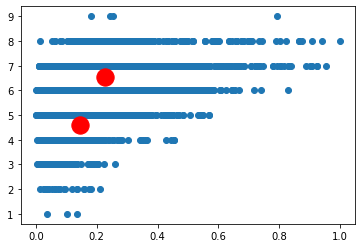

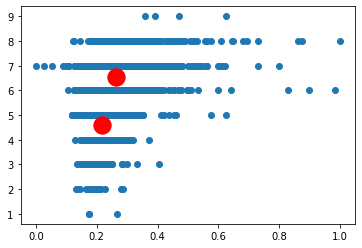

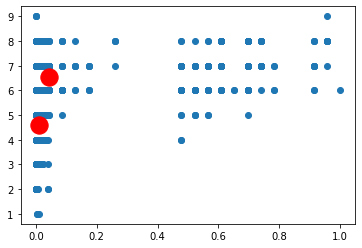

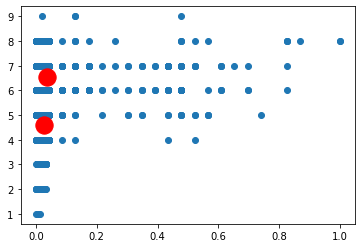

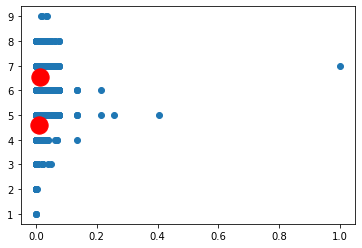

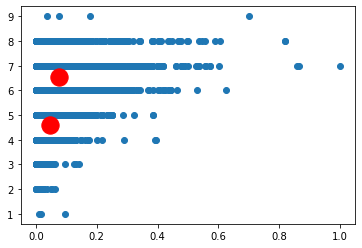

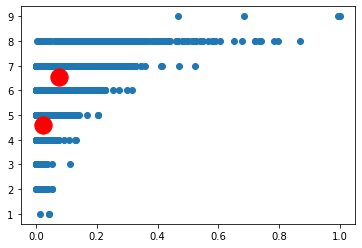

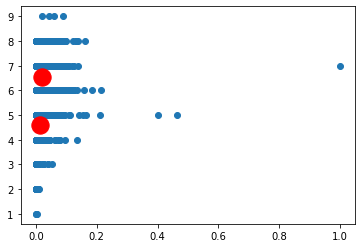

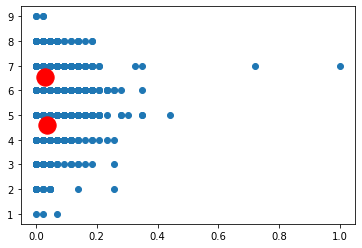

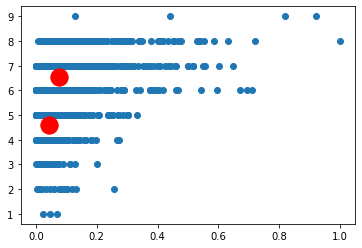

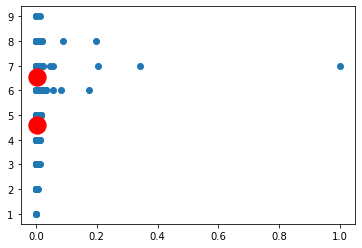

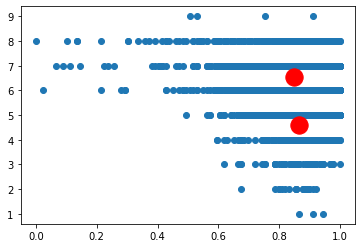

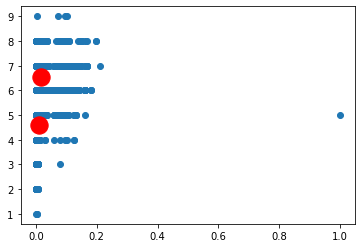

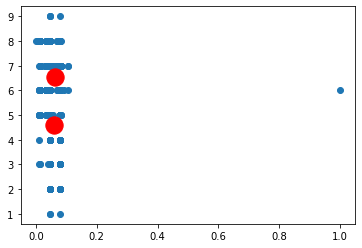

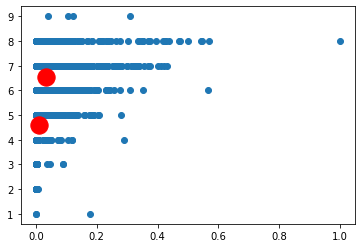

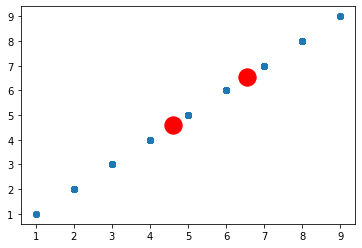

In [ ]:
#k =2
kmean = KMeans(n_clusters=2,random_state=0)
pred_y = kmean.fit_predict(normalized_df)
print('WCSS: '+str(kmean.inertia_))
print(pd.DataFrame(kmean.cluster_centers_[:,-1]))
j=0
for i in normalized_df.columns:
  plt.scatter(normalized_df[i], normalized_df['imdb_score'])
  plt.scatter(kmean.cluster_centers_[:, j], kmean.cluster_centers_[:, -1], s=300, c='red')
  plt.show()
  j+=1


WCSS: 1071.152936378577
          0
0  6.000000
1  4.608612
2  7.167963


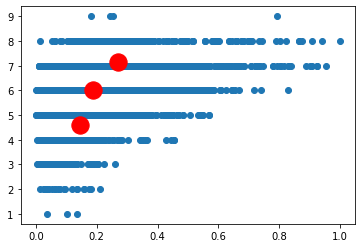

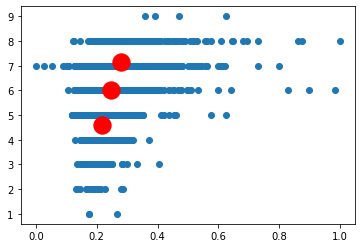

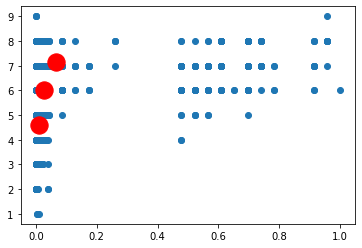

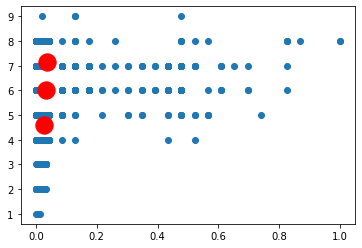

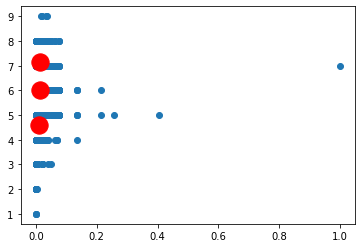

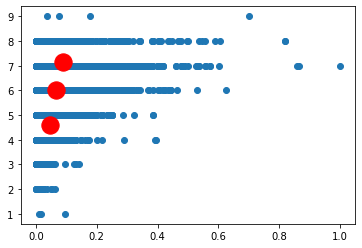

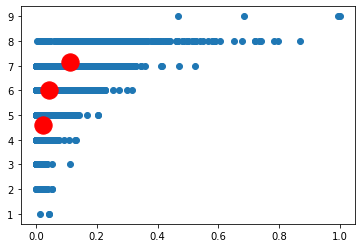

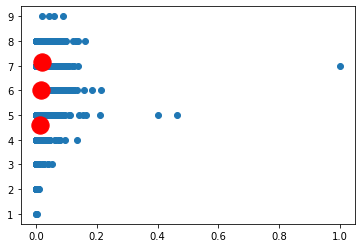

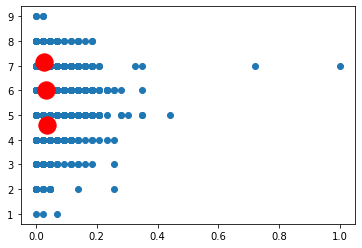

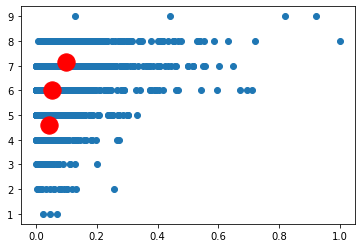

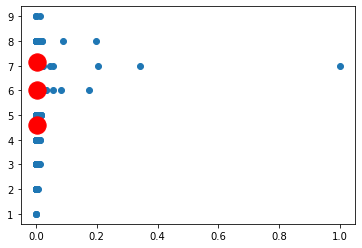

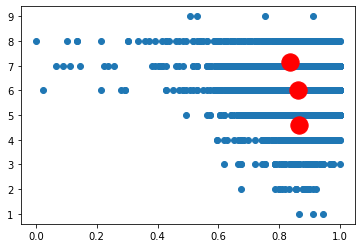

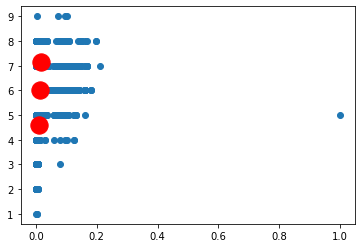

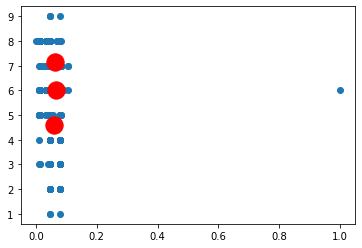

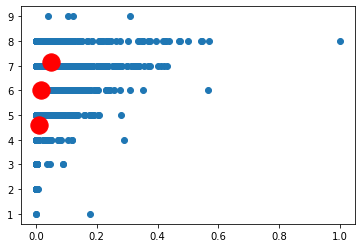

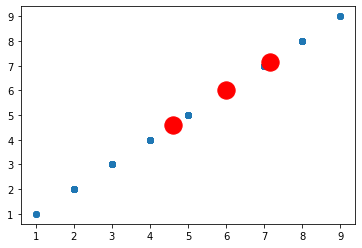

In [ ]:
#k =3
kmean = KMeans(n_clusters=3,random_state=0)
pred_y = kmean.fit_predict(normalized_df)
print('WCSS: '+str(kmean.inertia_))
print(pd.DataFrame(kmean.cluster_centers_[:,-1]))
j=0
for i in normalized_df.columns:
  plt.scatter(normalized_df[i], normalized_df['imdb_score'])
  plt.scatter(kmean.cluster_centers_[:, j], kmean.cluster_centers_[:, -1], s=300, c='red')
  plt.show()
  j+=1

WCSS: 359.60373405637733
          0
0  6.000000
1  5.000000
2  7.000000
3  8.018868
4  2.670588
5  4.000000


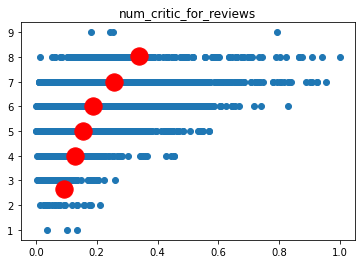

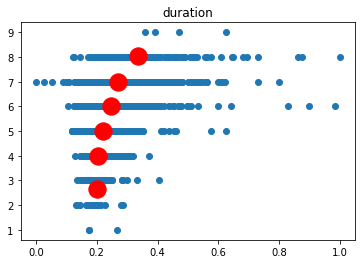

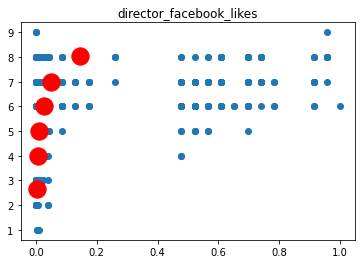

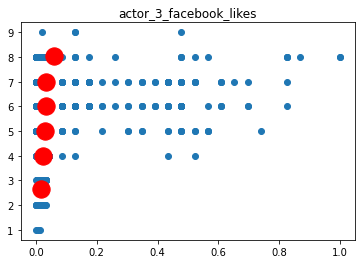

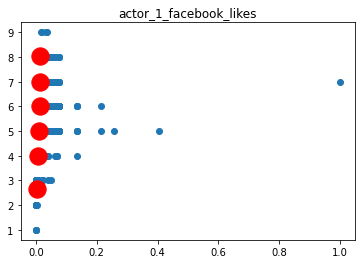

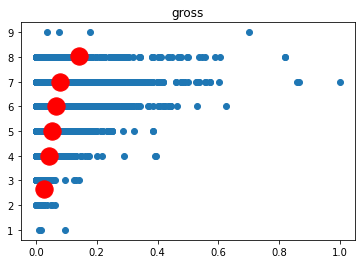

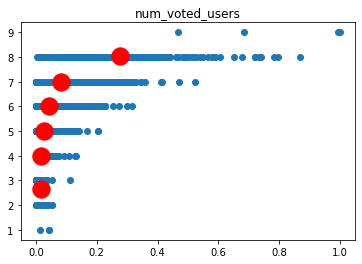

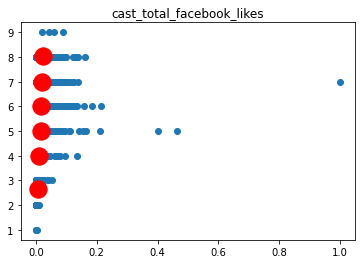

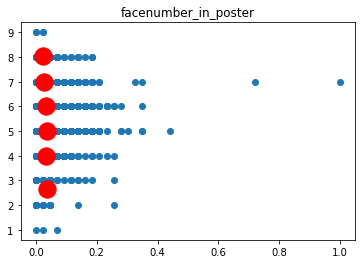

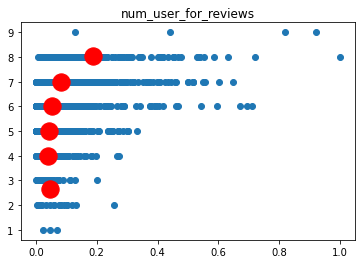

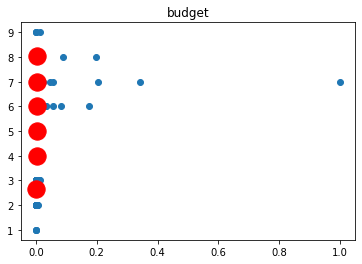

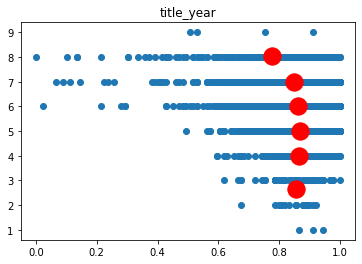

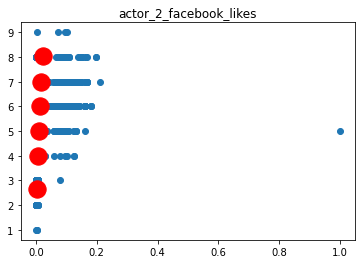

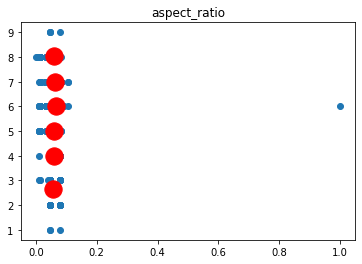

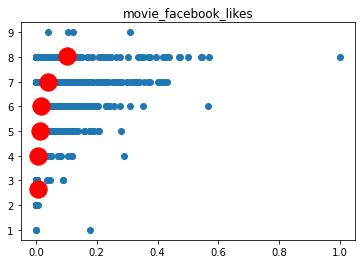

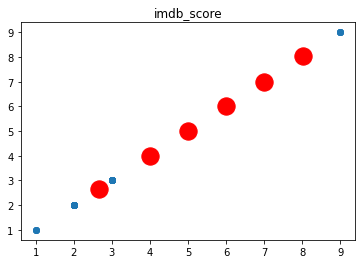

In [ ]:
#k =6
kmean = KMeans(n_clusters=6,random_state=0)
pred_y = kmean.fit_predict(normalized_df)
print('WCSS: '+str(kmean.inertia_))
print(pd.DataFrame(kmean.cluster_centers_[:,-1]))
j=0
for i in normalized_df.columns:
  plt.scatter(normalized_df[i], normalized_df['imdb_score'])
  plt.scatter(kmean.cluster_centers_[:, j], kmean.cluster_centers_[:, -1], s=300, c='red')
  plt.title(i)
  plt.show()
  j+=1